Project: Student Performance

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [2]:
df = pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Proportion of missing values for each column

In [3]:
df.isnull().sum() / df.shape[0]

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


There are no missing values in any of the six columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Univariate analysis and visualisation

Extracurricular Activities

Visualising value occurences of Extracurricular Activities

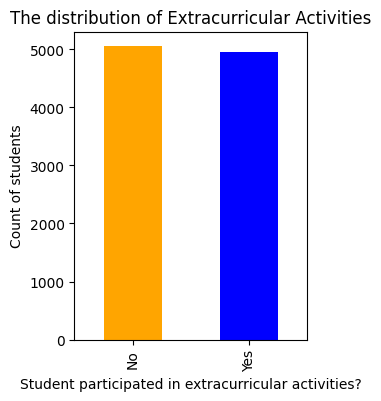

In [6]:
plt.figure(figsize=(3, 4))
df['Extracurricular Activities'].value_counts().plot(kind = "bar", color = ["orange", "blue"])

plt.title("The distribution of Extracurricular Activities")
plt.xlabel("Student participated in extracurricular activities?")
plt.ylabel("Count of students")
plt.show()

What does the visual tell us?


Around 5050 students did not participate in extracurricular activities, whereas around 4950 students did. The variable is relatively balanced.


Visualising value occurences of Extracurricular Activities

In [7]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

Understanding and visualising the other features

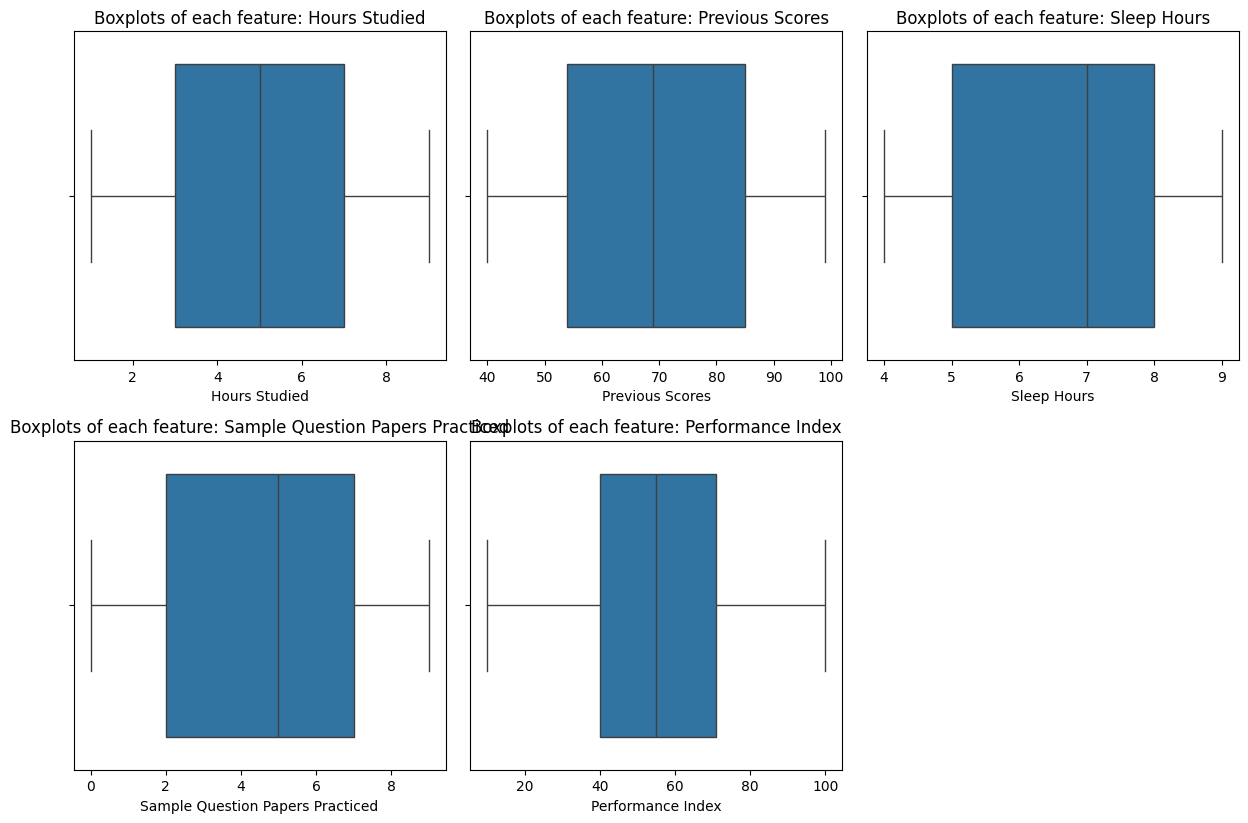

In [8]:
plt.figure(figsize=(12, 12))

for i, col in enumerate(['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']):

    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = col, data = df)
    plt.title(f'Boxplots of each feature: {col}')
    
plt.tight_layout() #preventing overlapping
plt.show()
    

Histograms

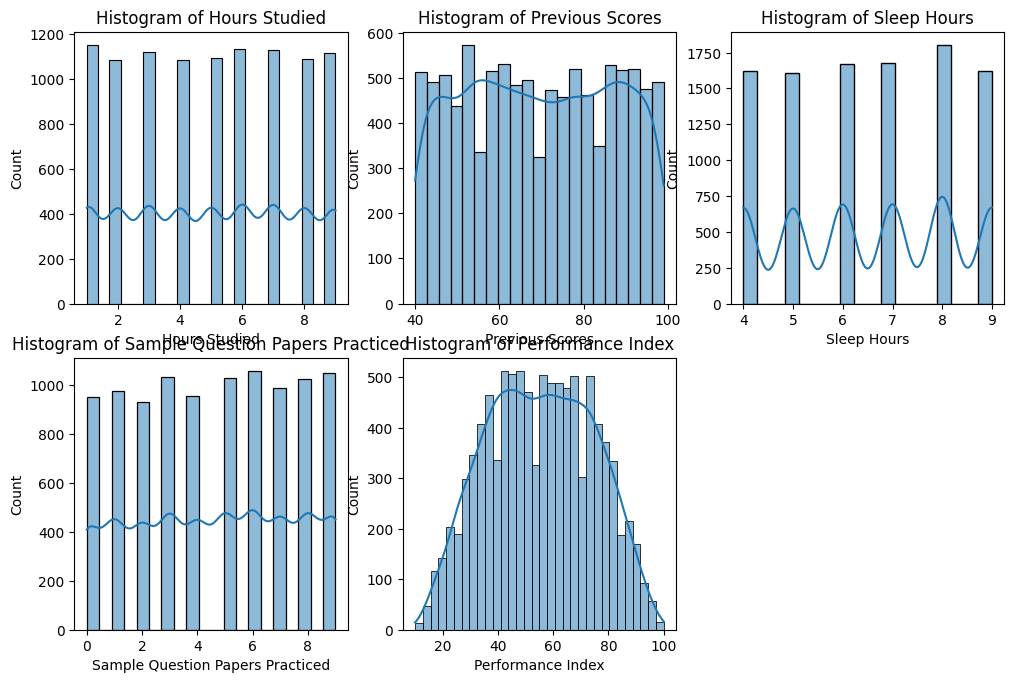

In [9]:
plt.figure(figsize=(12, 12))

for i, col in enumerate (['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(x = col, data = df, kde = True)
    plt.title(f'Histogram of {col}')
    
plt.tight_layout
plt.show()

(1) Histogram Hours Studied:
The distribution is symmetric. This means studied hours are evenly distributed around the mean with a balanced shape. The frequency slighly decreases as the hours of studies increases beyond the peak of around 4 to 5.

(2) Histogram of Previous Scores:
Previous Scores show longer tail toward higher scores around. Most scores appear to be towards the right side of histogram between 80 and 90. The distribution is slightly right skewed. In addition, the histogram shows no student obtained a maximum score of 100.

(3) Histogram Sleep Hours:
There are two peaks (mode) around 6 and 8 hours of sleep, appearing it to be bimodal. 

(4) Histogram of Sample Question Papers Practiced:
The peak appears to be that students practiced around 3 and 6 sample question papers.

Bivariate analysis

Students' extracurricular activities and their performance index

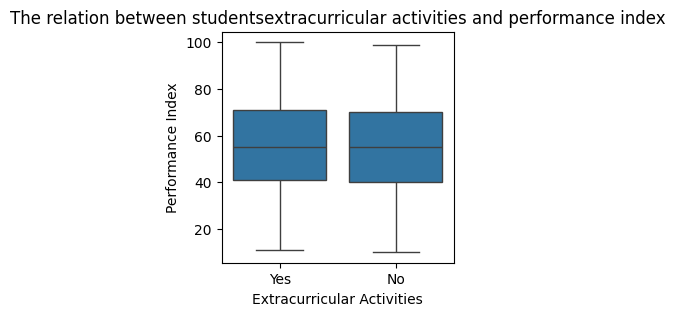

In [10]:
plt.figure(figsize=(3, 3))
sns.boxplot(x = df['Extracurricular Activities'], y = df['Performance Index'])

plt.title('The relation between students''extracurricular activities and performance index')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')

plt.show()


The graph indicates participating in extracurricular activities slightly supports achieving a higher performance index. 


Correlation analysis using a Heatmap

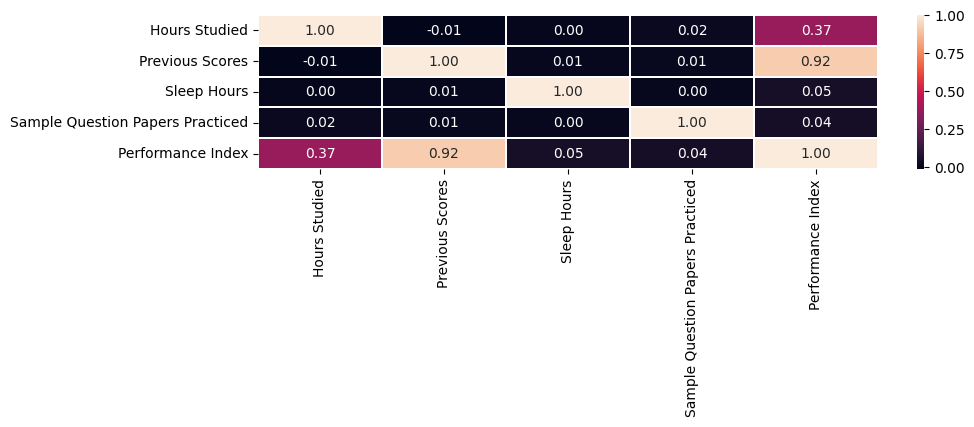

In [11]:
plt.figure(figsize=(10, 2))

sns.heatmap(df.select_dtypes(exclude = object).corr(), annot= True, linewidths = 0.2, fmt = ".2f")

plt.show()

On the relation between students' previous scores and students' performance index, the heatmap shows a strong positive (0.92) relation. Next, total study hours and students' performance index show a positive weak relation (0.37). Hours of sleep (0.00), sample question papers practiced (0.02) show a very weak positive correlation with students' performance index. Finally, previous exam scores show a negative and very weak (- 0.01) relation with students' performance index.


Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

Extracurricular Activities is a categorical variable.
It is transformed into numeric categories with its corresponding integers.

In [13]:
#mapping = {'Yes': 1, 'No': 0}
#df['Extracurricular Activities'] = df['Extracurricular Activities'].replace(mapping)
#df['Extracurricular Activities']

In [14]:
le = LabelEncoder()

df['Extracurricular Activities'] =  le.fit_transform(df['Extracurricular Activities'])
df['Extracurricular Activities']

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int32

Splitting the data into feature and target datasets

In [15]:
feature_variables = df.drop(columns = 'Performance Index')
feature_variables

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [16]:
target_variable = df['Performance Index']
target_variable 

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

Splitting the dataset into Train and Test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(feature_variables, target_variable, test_size= 0.2, random_state= 42)
X_train, X_test, y_train, y_test

(      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
 9254              5               49                           0            7   
 1561              2               48                           1            7   
 1670              2               81                           0            7   
 6087              2               46                           0            6   
 6669              8               47                           0            9   
 ...             ...              ...                         ...          ...   
 5734              8               50                           1            6   
 5191              4               68                           0            9   
 5390              9               48                           0            7   
 860               1               47                           0            9   
 7270              2               46                           0            6   
 
       Sample 

In [18]:
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 5)
y_train shape:  (8000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


Linear Regression Model

In [19]:
lm = LinearRegression()
lm

LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
lm.score(X_train, y_train)

0.9886898790682355

In [22]:
predict = np.round(lm.predict(X_test), decimals = 1)
predict

array([54.7, 22.6, 47.9, ..., 16.8, 63.3, 45.9])

In [23]:
X_train_with_const = sm.add_constant(X_train)

Observed performance vs. Predicted performance

In [24]:
pd.DataFrame({'Observed performance': y_test, 'Predicted performance' : predict})

,Observed performance,Predicted performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


Scatterplot to see the distribution

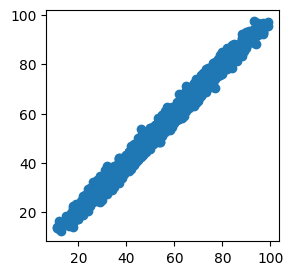

In [25]:
plt.figure(figsize=(3, 3))
plt.scatter(y_test, predict)
plt.show()

The scatterplot shows the relations between the observed performance values of the target variable (Performance Index) and the predicted performance values of the feature test dataset.

The values on the x-axis represents the observed performance of the individuals the dataset. The y-axis shows the predicted performance values generated by the machine learning model. Specifically, these values are the model's performance estimates based on the input features data as defined above. 

The diagonal line in the plot shows a perfect prediction, meaning the actual and predicted performance values would be identical. Points that fall along this line indicate perfect predictions, where the model's predictions match the actual values exactly.

Mean Absolute Error

In [26]:
mean_absolute_error(y_test,predict)

1.612

R-Squared

In [27]:
r2_score(y_test,predict)

0.9889704960519785

Coefficient values

In [28]:
lm.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

Each coefficient shows the change in students' performance index (target / dependent variable), associated with a one-unit increase in the corresponding feature / independent variable.

With coefficient of 2.9, students' study hours has the largest impact on students' performance index. This suggests that the amount of study hours increases the academic performance.
Similary, students' previous scores with a coefficient of around 1.0 show an impact on students' performance. This means that scores obtained by students in previous tests is associated with their academic performance.
Similarly, the amount of sleep, sample questions practiced have smaller but still positive impacts on their academic performance.

Intercept value

In [29]:
lm.intercept_

-33.921946215556126

The intercept shows the predicted value of students' academic performance (target variable), when all predictor variables (feature variable) are set to zero. This means, if all features are zero,  predicted Performance Index is around -33.92. It is important to notice that setting all feature variable to zero is not meaningful in this context.